# General methods

In [1]:
import pandas as pd
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
from datasets import get_dataset_split_names
import pickle

c:\Users\MartijnElands\Documents\Thesis\twister_V2_Azure\twister\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
plt.rcParams['figure.figsize'] = [14, 10] #default: [6.4, 4.8] #for the thesis report, please use the smaller one because of the resolution

In [3]:
MAIN_DIR = "C:/Users/MartijnElands/Documents/Thesis/twister/data/"

In [4]:
def to_dataframe(data_dict, subsets: list[str], print_dataframe: bool) -> dict[str, pd.DataFrame]:
    """
    Forms HuggingFace's dataset dictionary to a dictionary of pandas DataFrames

    Args:
        data_dict (dict[str, data]): dataset with a set indicating if it's train, validation or test set
        subsets (list[str]): list of subsets of dataset
        print_dataframe (bool): to print the converted dataframe

    Returns:
        dict[str, pd.DataFrame]: pd.DataFrame accompanied by the set
    """
    dfs = {}

    # Go over every subset and convert it to pandas DataFrame
    for subset in tqdm(subsets):
        dfs[subset] = pd.DataFrame(data_dict[subset])

    # Different for loop for better printing
    for subset in subsets:
        print(subset, len(dfs[subset]))
        if(print_dataframe): display(dfs[subset])

    print(dfs[subsets[-1]].columns) #print columns of last df

    return dfs

In [5]:
from sklearn.preprocessing import LabelEncoder


def show_distribution(dfs: dict[str, pd.DataFrame], subsets: list[str], show_plot: bool, label_name: str) -> None:
    """
    Shows class distribution of dataset

    Args:
        dfs (dict[str, pd.DataFrame]): pd.DataFrame accompanied by the set
        subsets (list[str]): list of subsets in dataset
        show_plot (bool): to show distributionplot
        label_name (str): to indicate what the class name is
    """
    # Go over every subset and plot distribution of the data

    l = LabelEncoder()
    l.fit(dfs[subsets[0]][label_name].to_list())
    

    for subset in subsets:
        label_name_altered = label_name + '_altered'
        dfs[subset][label_name_altered] = l.transform(dfs[subset][label_name].to_list())
        c = Counter(dfs[subset][label_name_altered].to_list())
        D = dict(sorted(dict(c).items()))
        print(D)

        if show_plot:
            plt.bar(range(len(D)), list(D.values()), align='center')
            plt.xticks(range(len(D)), list(D.keys()))
            plt.ylabel('Number of samples')
            plt.xlabel('Classes')
            plt.title(label='Distribution of '+subset+' set')
            plt.show()

    print(l.classes_)

In [6]:
def show_text_length(dfs: dict[str, pd.DataFrame], subsets: list[str], text_name: str) -> None:
    """
    Show statistics about the text lenght in dataset

    Args:
        dfs (dict[str, pd.DataFrame]): pd.DataFrame accompanied by the set
        subsets (list[str]): list of subsets in dataset
        text_name (str): to indicate what the text column name is
    """
    length_lists = []

    # Go over every subset and compute the mean of the text length and the STD.
    for subset in subsets:
        avg_length = (dfs[subset][text_name].str.len()).mean()
        print(subset, avg_length)
        length_lists.append(avg_length)

    print('Mean of means', np.mean(length_lists))
    print('STD of means', np.std(length_lists))

# Tweet eval, EMOJI
on [HuggingFace](https://huggingface.co/datasets/tweet_eval)

papers: [PapersWithCode](https://paperswithcode.com/dataset/tweeteval) when searching on "shot", only 1 paper shows up from 2021.

In [6]:
dataset = load_dataset(path="tweet_eval", name="emoji")
print(get_dataset_split_names("tweet_eval", "emoji"))
splits = ["train", "test", "validation"]
print(dataset.keys())
df = to_dataframe(dataset, splits, False)

Found cached dataset tweet_eval (C:/Users/MartijnElands/.cache/huggingface/datasets/tweet_eval/emoji/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)
100%|██████████| 3/3 [00:00<00:00, 24.72it/s]


['train', 'test', 'validation']
dict_keys(['train', 'test', 'validation'])


100%|██████████| 3/3 [00:06<00:00,  2.04s/it]

train 45000
test 50000
validation 5000
Index(['text', 'label'], dtype='object')


In [7]:
for subset in splits:
    path = MAIN_DIR + "TweetEvalEmoji" + "_" + subset + ".csv"
    #defaults to protocol 5, which is not readable for Kaggle.
    #From Python 3.8, protocol 5 got to be the new standard.
    #df[subset].to_pickle(MAIN_DIR + "TweetEvalEmoji" + "_" + subset +".pkl")
    df[subset].to_pickle(MAIN_DIR + "TweetEvalEmoji" + "_" + subset +"_4.pkl", protocol=4)

In [8]:
pd.__version__

'1.5.3'

train : Counter({0: 9204, 1: 4901, 2: 4713, 7: 2345, 4: 2146, 5: 2132, 6: 2078, 3: 2043, 10: 1982, 18: 1510, 17: 1397, 9: 1391, 16: 1350, 8: 1287, 12: 1246, 14: 1224, 19: 1191, 13: 980, 11: 946, 15: 934})
{0: 9204, 1: 4901, 2: 4713, 3: 2043, 4: 2146, 5: 2132, 6: 2078, 7: 2345, 8: 1287, 9: 1391, 10: 1982, 11: 946, 12: 1246, 13: 980, 14: 1224, 15: 934, 16: 1350, 17: 1397, 18: 1510, 19: 1191}


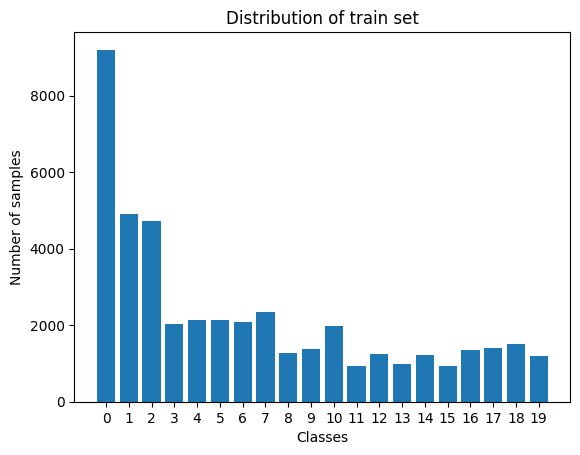

test : Counter({0: 10798, 1: 4830, 2: 4534, 4: 3716, 7: 2749, 3: 2605, 18: 2417, 6: 1996, 11: 1949, 5: 1613, 8: 1549, 17: 1545, 10: 1432, 14: 1306, 12: 1265, 15: 1244, 9: 1175, 16: 1153, 13: 1114, 19: 1010})
{0: 10798, 1: 4830, 2: 4534, 3: 2605, 4: 3716, 5: 1613, 6: 1996, 7: 2749, 8: 1549, 9: 1175, 10: 1432, 11: 1949, 12: 1265, 13: 1114, 14: 1306, 15: 1244, 16: 1153, 17: 1545, 18: 2417, 19: 1010}


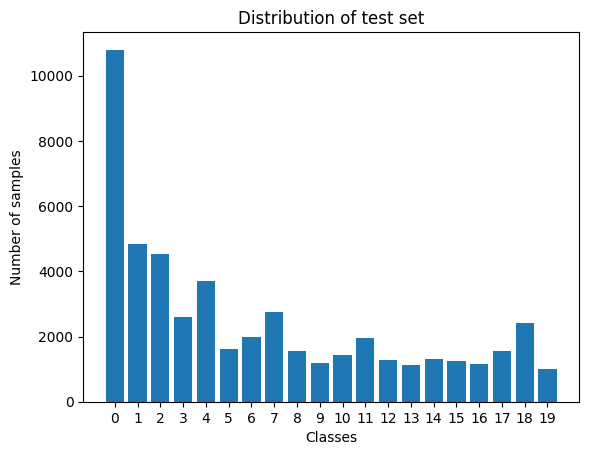

validation : Counter({0: 1056, 1: 521, 2: 504, 3: 308, 4: 243, 5: 238, 6: 204, 7: 199, 8: 177, 9: 171, 10: 159, 13: 153, 15: 148, 11: 143, 16: 137, 19: 131, 14: 129, 12: 129, 18: 129, 17: 121})
{0: 1056, 1: 521, 2: 504, 3: 308, 4: 243, 5: 238, 6: 204, 7: 199, 8: 177, 9: 171, 10: 159, 11: 143, 12: 129, 13: 153, 14: 129, 15: 148, 16: 137, 17: 121, 18: 129, 19: 131}


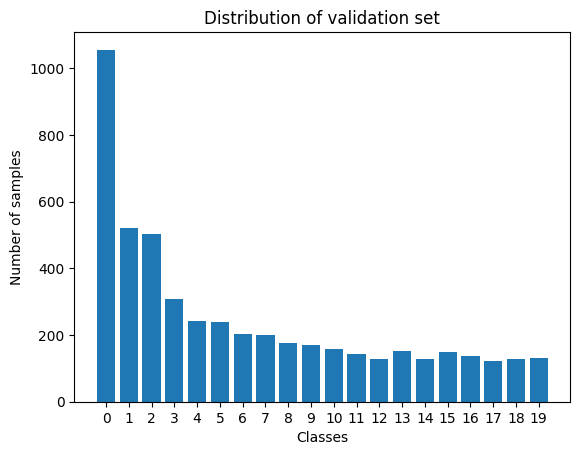

In [5]:
show_distribution(df, splits, True, 'label')

In [6]:
show_text_length(df, splits, 'text')

train 71.01691111111111
test 71.29676
validation 66.3676
Mean of means 69.5604237037037
STD of means 2.2605561634772227


In [7]:
Counter(df['train']['label'].to_list()).most_common()

[(0, 9204),
 (1, 4901),
 (2, 4713),
 (7, 2345),
 (4, 2146),
 (5, 2132),
 (6, 2078),
 (3, 2043),
 (10, 1982),
 (18, 1510),
 (17, 1397),
 (9, 1391),
 (16, 1350),
 (8, 1287),
 (12, 1246),
 (14, 1224),
 (19, 1191),
 (13, 980),
 (11, 946),
 (15, 934)]

# Amazon US reviews

on [HuggingFace](https://huggingface.co/datasets/amazon_us_reviews)

## V1_00 approx. 21 minutes to load

In [7]:
book_set = "Books_v1_00" #takes approx. 21 minutes to load
dataset = load_dataset("amazon_us_reviews", book_set) 

subsets = ["train"]

df = to_dataframe(dataset, subsets, False)

Found cached dataset amazon_us_reviews (C:/Users/MartijnElands/.cache/huggingface/datasets/amazon_us_reviews/Books_v1_02/0.1.0/17b2481be59723469538adeb8fd0a68b0ba363bbbdd71090e72c325ee6c7e563)
100%|██████████| 1/1 [05:44<00:00, 344.48s/it]

train 3105520
Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')


In [13]:
for subset in subsets:
    path = MAIN_DIR + "AmazonReviews" + book_set + "_" + ".csv"
    df[subset].to_csv(path)

OSError: Cannot save file into a non-existent directory: 'data'

{1: 238221, 2: 166384, 3: 249926, 4: 586182, 5: 1864807}


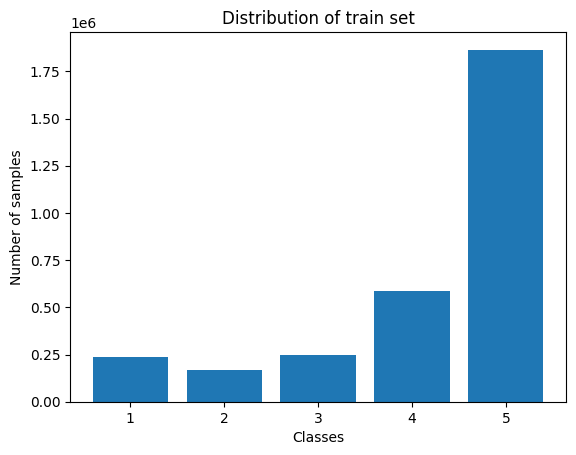

In [8]:
show_distribution(df, subsets, True, 'star_rating')

In [10]:
show_text_length(df, subsets, 'review_body')

train 492.54080369489947
Mean of means 492.54080369489947
STD of means 0.0


## V1_01 approx. 14 minutes to load

In [ ]:
book_set = "Books_v1_01" #takes approx. 14 minutes to load
dataset = load_dataset("amazon_us_reviews", book_set) 

subsets = ["train"]

df = to_dataframe(dataset, subsets, False)

In [ ]:
for subset in subsets:
    path = MAIN_DIR + "AmazonReviews" + book_set + "_" + ".csv"
    df[subset].to_csv(path)

In [ ]:
show_distribution(df, subsets, True, 'star_rating')

In [ ]:
show_text_length(df, subsets, 'review_body')

## V1_02 approx. 6 minutes to load

In [ ]:
book_set = "Books_v1_02" #takes approx. 6 minutes to load
dataset = load_dataset("amazon_us_reviews", book_set) 

subsets = ["train"]

df = to_dataframe(dataset, subsets, False)

In [ ]:
show_distribution(df, subsets, True, 'star_rating')

In [ ]:
show_text_length(df, subsets, 'review_body')

# trec dataset

on [HuggingFace](https://huggingface.co/datasets/trec)

not picked due to only 5 classes, seems alrighty balanced and fine_labels is too many

In [11]:
from datasets import load_dataset

dataset = load_dataset("trec")
subsets = ["train", "test"]

df = to_dataframe(dataset, subsets, False)

Found cached dataset trec (C:/Users/MartijnElands/.cache/huggingface/datasets/trec/default/2.0.0/f2469cab1b5fceec7249fda55360dfdbd92a7a5b545e91ea0f78ad108ffac1c2)
100%|██████████| 2/2 [00:00<00:00, 11.70it/s]

train 5452
test 500
Index(['text', 'coarse_label', 'fine_label'], dtype='object')


train : Counter({1: 1250, 3: 1223, 2: 1162, 5: 896, 4: 835, 0: 86})
{0: 86, 1: 1250, 2: 1162, 3: 1223, 4: 835, 5: 896}


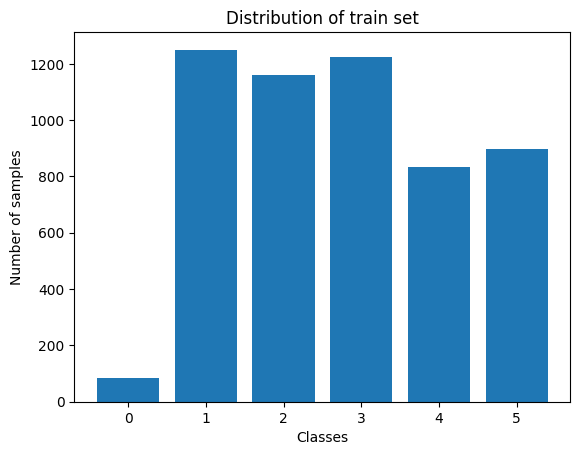

test : Counter({2: 138, 5: 113, 1: 94, 4: 81, 3: 65, 0: 9})
{0: 9, 1: 94, 2: 138, 3: 65, 4: 81, 5: 113}


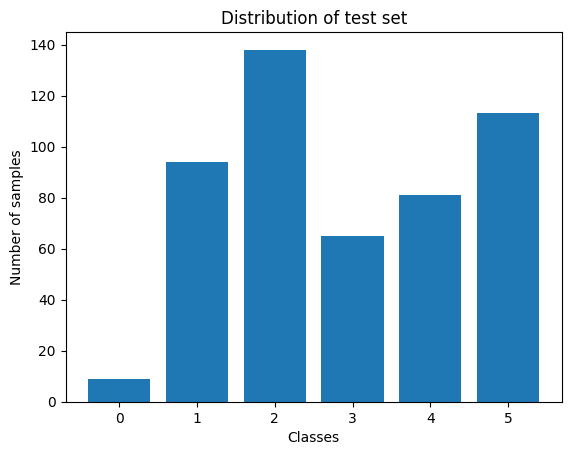

In [12]:
show_distribution(df, subsets, True, 'coarse_label')

train : Counter({29: 962, 35: 464, 24: 421, 38: 363, 26: 276, 25: 274, 39: 218, 13: 217, 5: 207, 27: 191, 28: 189, 33: 155, 32: 129, 2: 112, 9: 103, 7: 103, 21: 93, 44: 75, 41: 71, 1: 70, 36: 66, 17: 62, 8: 56, 43: 52, 31: 47, 15: 42, 18: 41, 4: 40, 20: 38, 40: 34, 45: 27, 22: 27, 23: 26, 30: 25, 34: 21, 3: 16, 0: 16, 11: 16, 14: 13, 48: 13, 19: 11, 49: 11, 10: 10, 12: 9, 46: 9, 37: 9, 47: 8, 42: 6, 16: 4, 6: 4})
{0: 16, 1: 70, 2: 112, 3: 16, 4: 40, 5: 207, 6: 4, 7: 103, 8: 56, 9: 103, 10: 10, 11: 16, 12: 9, 13: 217, 14: 13, 15: 42, 16: 4, 17: 62, 18: 41, 19: 11, 20: 38, 21: 93, 22: 27, 23: 26, 24: 421, 25: 274, 26: 276, 27: 191, 28: 189, 29: 962, 30: 25, 31: 47, 32: 129, 33: 155, 34: 21, 35: 464, 36: 66, 37: 9, 38: 363, 39: 218, 40: 34, 41: 71, 42: 6, 43: 52, 44: 75, 45: 27, 46: 9, 47: 8, 48: 13, 49: 11}


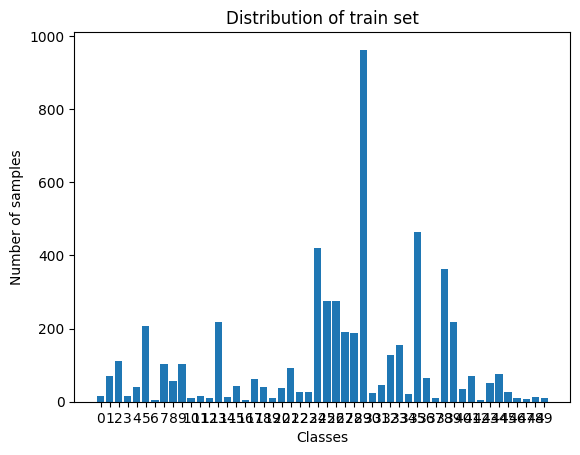

test : Counter({24: 123, 29: 55, 35: 50, 39: 47, 32: 18, 40: 16, 2: 16, 18: 15, 43: 12, 13: 12, 4: 10, 38: 9, 44: 8, 1: 8, 25: 7, 36: 7, 21: 7, 28: 6, 27: 6, 46: 6, 6: 6, 14: 5, 47: 5, 49: 4, 9: 4, 15: 4, 22: 4, 31: 3, 34: 3, 41: 3, 33: 3, 45: 3, 8: 2, 26: 2, 3: 2, 11: 2, 7: 2, 30: 1, 10: 1, 0: 1, 17: 1, 20: 1})
{0: 1, 1: 8, 2: 16, 3: 2, 4: 10, 6: 6, 7: 2, 8: 2, 9: 4, 10: 1, 11: 2, 13: 12, 14: 5, 15: 4, 17: 1, 18: 15, 20: 1, 21: 7, 22: 4, 24: 123, 25: 7, 26: 2, 27: 6, 28: 6, 29: 55, 30: 1, 31: 3, 32: 18, 33: 3, 34: 3, 35: 50, 36: 7, 38: 9, 39: 47, 40: 16, 41: 3, 43: 12, 44: 8, 45: 3, 46: 6, 47: 5, 49: 4}


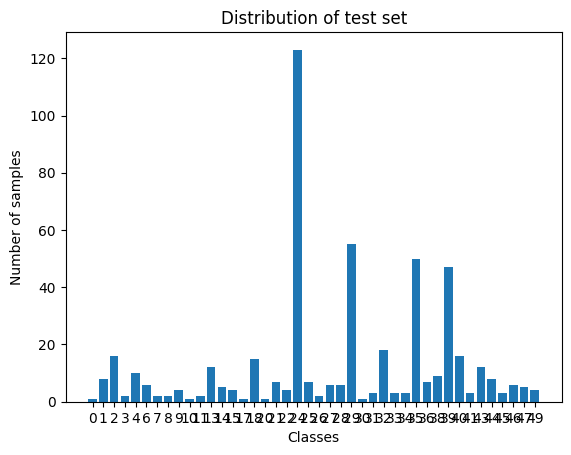

In [13]:
show_distribution(df, subsets, True, 'fine_label')

In [14]:
show_text_length(df, subsets, 'text')

train 50.63206162876009
test 35.958
Mean of means 43.29503081438004
STD of means 7.3370308143800465


# DBPedia_14 (imbalancing & undersampling is needed for thesis)

on [HuggingFace](https://huggingface.co/datasets/dbpedia_14)

on [PyTorch_dbpedia](https://pytorch.org/text/stable/datasets.html#torchtext.datasets.DBpedia)

papers: [PapersWithCode](https://paperswithcode.com/dataset/dbpedia)

In [6]:
from datasets import load_dataset

dataset = load_dataset("dbpedia_14")
subsets = ["train", "test"]

df = to_dataframe(dataset, subsets, False)

Found cached dataset dbpedia_14 (C:/Users/MartijnElands/.cache/huggingface/datasets/dbpedia_14/dbpedia_14/2.0.0/01dab9e10d969eadcdbc918be5a09c9190a24caeae33b10eee8f367a1e3f1f0c)
100%|██████████| 2/2 [00:17<00:00,  8.96s/it]

train 560000
test 70000
Index(['label', 'title', 'content'], dtype='object')


{0: 40000, 1: 40000, 2: 40000, 3: 40000, 4: 40000, 5: 40000, 6: 40000, 7: 40000, 8: 40000, 9: 40000, 10: 40000, 11: 40000, 12: 40000, 13: 40000}


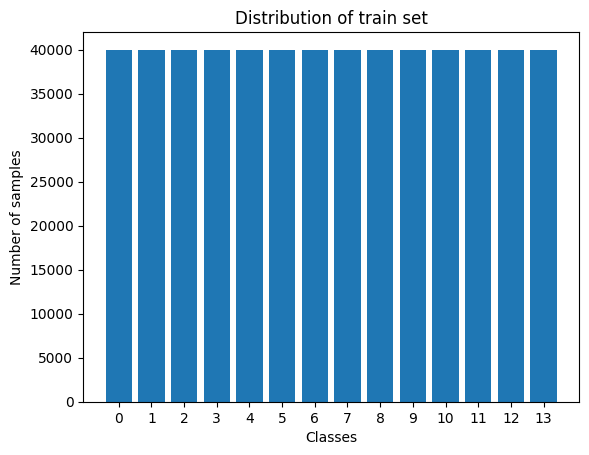

{0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000, 10: 5000, 11: 5000, 12: 5000, 13: 5000}


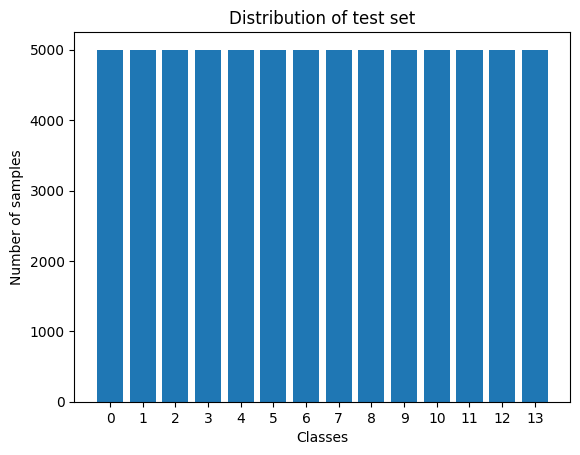

In [7]:
show_distribution(df, subsets, True, 'label')

In [8]:
show_text_length(df, subsets, 'title')

train 18.8498
test 18.898857142857143
Mean of means 18.87432857142857
STD of means 0.02452857142857212


In [9]:
show_text_length(df, subsets, 'content')

train 281.3993660714286
test 281.4029857142857
Mean of means 281.40117589285717
STD of means 0.0018098214285657832


In [10]:
df['train']

,label,title,content
0,0,E. D. Abbott Ltd,Abbott of Farnham E D Abbott Limited was a Br...
1,0,Schwan-Stabilo,Schwan-STABILO is a German maker of pens for ...
2,0,Q-workshop,Q-workshop is a Polish company located in Poz...
3,0,Marvell Software Solutions Israel,Marvell Software Solutions Israel known as RA...
4,0,Bergan Mercy Medical Center,Bergan Mercy Medical Center is a hospital loc...
...,...,...,...
559995,13,Barking in Essex,Barking in Essex is a Black comedy play direc...
559996,13,Science & Spirit,Science & Spirit is a discontinued American b...
559997,13,The Blithedale Romance,The Blithedale Romance (1852) is Nathaniel Ha...
559998,13,Razadarit Ayedawbon,Razadarit Ayedawbon (Burmese: ရာဇာဓိရာဇ် အရေး...


In [16]:
mapper = {
    0: 'Company',
    1: 'EducationalInstitution',
    2: 'Artist',
    3: 'Athlete',
    4: 'OfficeHolder',
    5: 'MeanOfTransportation',
    6: 'Building',
    7: 'NaturalPlace',
    8: 'Village',
    9: 'Animal',
    10: 'Plant',
    11: 'Album',
    12: 'Film',
    13: 'WrittenWork'
}

for split in df:
    df[split]['label_class'] = df[split]['label'].map(mapper)
    display(df[split])

,label,title,content,label_class
0,0,E. D. Abbott Ltd,Abbott of Farnham E D Abbott Limited was a Br...,Company
1,0,Schwan-Stabilo,Schwan-STABILO is a German maker of pens for ...,Company
2,0,Q-workshop,Q-workshop is a Polish company located in Poz...,Company
3,0,Marvell Software Solutions Israel,Marvell Software Solutions Israel known as RA...,Company
4,0,Bergan Mercy Medical Center,Bergan Mercy Medical Center is a hospital loc...,Company
...,...,...,...,...
559995,13,Barking in Essex,Barking in Essex is a Black comedy play direc...,WrittenWork
559996,13,Science & Spirit,Science & Spirit is a discontinued American b...,WrittenWork
559997,13,The Blithedale Romance,The Blithedale Romance (1852) is Nathaniel Ha...,WrittenWork
559998,13,Razadarit Ayedawbon,Razadarit Ayedawbon (Burmese: ရာဇာဓိရာဇ် အရေး...,WrittenWork


,label,title,content,label_class
0,0,TY KU,TY KU /taɪkuː/ is an American alcoholic bever...,Company
1,0,Odd Lot Entertainment,OddLot Entertainment founded in 2001 by longt...,Company
2,0,Henkel,Henkel AG & Company KGaA operates worldwide w...,Company
3,0,GOAT Store,The GOAT Store (Games Of All Type Store) LLC ...,Company
4,0,RagWing Aircraft Designs,RagWing Aircraft Designs (also called the Rag...,Company
...,...,...,...,...
69995,13,Energy Victory,Energy Victory: Winning the War on Terror by ...,WrittenWork
69996,13,Bestiario,Bestiario is a book of 8 short stories writte...,WrittenWork
69997,13,Wuthering Heights,Wuthering Heights is a novel by Emily Brontë ...,WrittenWork
69998,13,L'Indépendant,L'Indépendant is a newspaper published in Lux...,WrittenWork


# DBPedia_Classes (undersampling is needed for thesis)

on [HuggingFace](https://huggingface.co/datasets/DeveloperOats/DBPedia_Classes)

papers: [PapersWithCode original DBPedia](https://paperswithcode.com/dataset/dbpedia)

In [7]:
from datasets import load_dataset

dataset = load_dataset("DeveloperOats/DBPedia_Classes")
subsets = ["train", "test", "validation"]

df = to_dataframe(dataset, subsets, False)

Found cached dataset csv (C:/Users/MartijnElands/.cache/huggingface/datasets/DeveloperOats___csv/DeveloperOats--DBPedia_Classes-745bb82299e080ae/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)
100%|██████████| 3/3 [00:10<00:00,  3.61s/it]

train 240942
test 60794
validation 36003
Index(['text', 'l1', 'l2', 'l3'], dtype='object')


In [9]:
df["train"]["custom_label"] = df["train"]['l1'].apply(lambda x: 'Agent' if x == 'Agent' else 'nonAgent')

{0: 124798, 1: 116144}


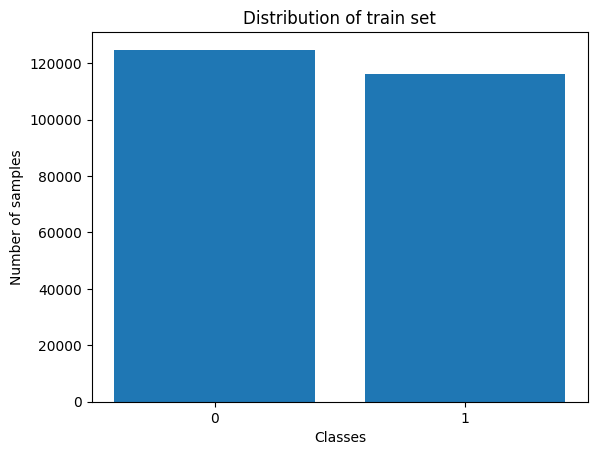

['Agent' 'nonAgent']


In [10]:
show_distribution(df, ["train"], True, 'custom_label')

In [11]:
for f in df:
    print(f"{f} size: {len(df[f])}")
    #print()

train size: 240942
test size: 60794
validation size: 36003


In [20]:
plt.rcParams.update({'font.size': 11}) #default: 10.0

{0: 124798, 1: 248, 2: 19106, 3: 45877, 4: 21472, 5: 5883, 6: 784, 7: 1761, 8: 21013}


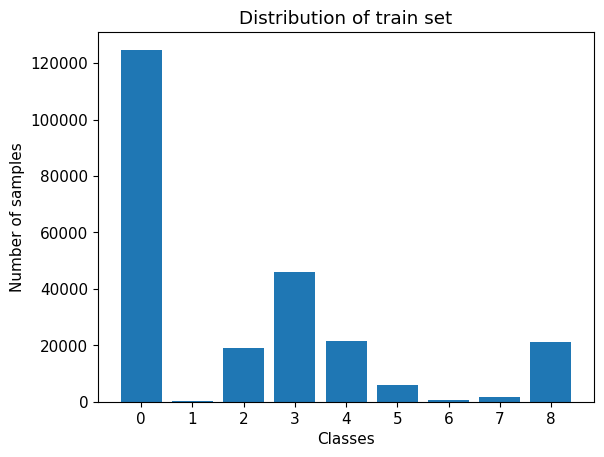

{0: 31495, 1: 62, 2: 4820, 3: 11574, 4: 5418, 5: 1483, 6: 198, 7: 444, 8: 5300}


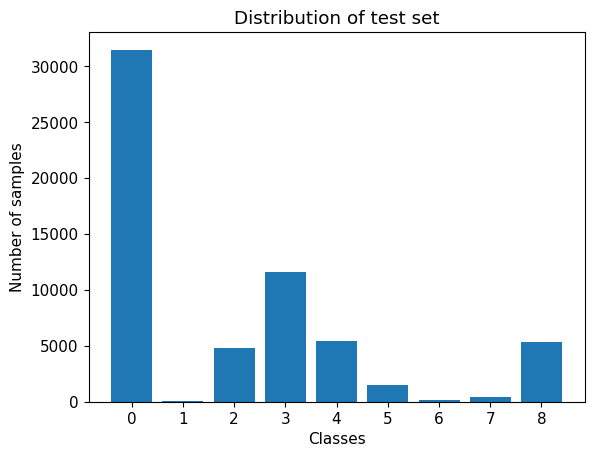

{0: 18647, 1: 37, 2: 2854, 3: 6855, 4: 3210, 5: 879, 6: 117, 7: 263, 8: 3141}


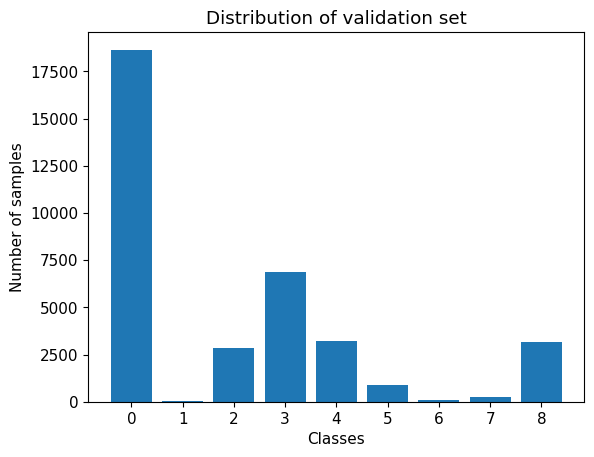

['Agent' 'Device' 'Event' 'Place' 'Species' 'SportsSeason'
 'TopicalConcept' 'UnitOfWork' 'Work']


In [21]:
show_distribution(df, subsets, True, 'l1')

In [5]:
df['train'].to_csv(path_or_buf=MAIN_DIR+"dbpedia_classes_train.csv")
df['test'].to_csv(path_or_buf=MAIN_DIR+"dbpedia_classes_test.csv")
df['validation'].to_csv(path_or_buf=MAIN_DIR+"dbpedia_classes_validation.csv")

In [12]:
# To prevent possible leakage between train, test and validation sets, we will go over every split and make sure to save the keywords for each split
split_labels = {}

for split in df:
    dataframe = df[split].drop(columns=["text", "l3"], inplace=False).groupby(['l1','l2']).count().reset_index()
    main_labels = dataframe["l1"].to_list()

    label_keywords = {}
    split_labels[split] = label_keywords
    for label in main_labels:
        label_keywords[label] = dataframe[dataframe["l1"] == label]["l2"].to_list()

In [13]:
split_labels["train"]

{'Agent': ['Actor',
  'Artist',
  'Athlete',
  'Boxer',
  'BritishRoyalty',
  'Broadcaster',
  'Cleric',
  'Coach',
  'ComicsCharacter',
  'Company',
  'EducationalInstitution',
  'FictionalCharacter',
  'GridironFootballPlayer',
  'Group',
  'MotorcycleRider',
  'MusicalArtist',
  'Organisation',
  'OrganisationMember',
  'Person',
  'Politician',
  'Presenter',
  'RacingDriver',
  'Scientist',
  'SportsLeague',
  'SportsManager',
  'SportsTeam',
  'VolleyballPlayer',
  'WinterSportPlayer',
  'Wrestler',
  'Writer'],
 'Device': ['Engine'],
 'Event': ['NaturalEvent',
  'Olympics',
  'Race',
  'SocietalEvent',
  'SportsEvent',
  'Tournament'],
 'Place': ['AmusementParkAttraction',
  'BodyOfWater',
  'Building',
  'CelestialBody',
  'ClericalAdministrativeRegion',
  'Infrastructure',
  'NaturalPlace',
  'RaceTrack',
  'RouteOfTransportation',
  'Satellite',
  'Settlement',
  'SportFacility',
  'Station',
  'Stream',
  'Tower',
  'Venue'],
 'Species': ['Animal', 'Eukaryote', 'FloweringPla

In [14]:
for l1 in split_labels["train"]:
    print(l1)
    print(len(split_labels["train"][l1]))

Agent
30
Device
1
Event
6
Place
16
Species
5
SportsSeason
2
TopicalConcept
1
UnitOfWork
1
Work
8


In [15]:
for l1_labels in split_labels["train"]:
    print(split_labels["train"][l1_labels])
    print(len(split_labels["train"][l1_labels]))

['Actor', 'Artist', 'Athlete', 'Boxer', 'BritishRoyalty', 'Broadcaster', 'Cleric', 'Coach', 'ComicsCharacter', 'Company', 'EducationalInstitution', 'FictionalCharacter', 'GridironFootballPlayer', 'Group', 'MotorcycleRider', 'MusicalArtist', 'Organisation', 'OrganisationMember', 'Person', 'Politician', 'Presenter', 'RacingDriver', 'Scientist', 'SportsLeague', 'SportsManager', 'SportsTeam', 'VolleyballPlayer', 'WinterSportPlayer', 'Wrestler', 'Writer']
30
['Engine']
1
['NaturalEvent', 'Olympics', 'Race', 'SocietalEvent', 'SportsEvent', 'Tournament']
6
['AmusementParkAttraction', 'BodyOfWater', 'Building', 'CelestialBody', 'ClericalAdministrativeRegion', 'Infrastructure', 'NaturalPlace', 'RaceTrack', 'RouteOfTransportation', 'Satellite', 'Settlement', 'SportFacility', 'Station', 'Stream', 'Tower', 'Venue']
16
['Animal', 'Eukaryote', 'FloweringPlant', 'Horse', 'Plant']
5
['FootballLeagueSeason', 'SportsTeamSeason']
2
['Genre']
1
['LegalCase']
1
['Cartoon', 'Comic', 'Database', 'MusicalWork

In [42]:
# To prevent possible leakage between train, test and validation sets, we will go over every split and make sure to save the keywords for each split
split_labels_l3 = {}

for split in df:
    dataframe = df[split].drop(columns=["text", "l2"], inplace=False).groupby(['l1','l3']).count().reset_index()
    main_labels = dataframe["l1"].to_list()

    label_keywords = {}
    split_labels_l3[split] = label_keywords
    for label in main_labels:
        label_keywords[label] = dataframe[dataframe["l1"] == label]["l3"].to_list()

In [43]:
split_labels_l3["train"]

{'Agent': ['AdultActor',
  'Airline',
  'AmateurBoxer',
  'Ambassador',
  'AmericanFootballPlayer',
  'AnimangaCharacter',
  'Architect',
  'Astronaut',
  'AustralianFootballTeam',
  'AustralianRulesFootballPlayer',
  'BadmintonPlayer',
  'Band',
  'Bank',
  'Baronet',
  'BaseballLeague',
  'BaseballPlayer',
  'BasketballLeague',
  'BasketballPlayer',
  'BasketballTeam',
  'BeachVolleyballPlayer',
  'BeautyQueen',
  'Bodybuilder',
  'Brewery',
  'BroadcastNetwork',
  'BusCompany',
  'BusinessPerson',
  'CanadianFootballTeam',
  'Canoeist',
  'Cardinal',
  'Chef',
  'ChessPlayer',
  'ChristianBishop',
  'ClassicalMusicArtist',
  'CollegeCoach',
  'Comedian',
  'ComicsCreator',
  'Congressman',
  'CricketTeam',
  'Cricketer',
  'Curler',
  'CyclingTeam',
  'Cyclist',
  'DartsPlayer',
  'Economist',
  'Engineer',
  'Entomologist',
  'FashionDesigner',
  'FigureSkater',
  'FormulaOneRacer',
  'GaelicGamesPlayer',
  'GolfPlayer',
  'Governor',
  'Gymnast',
  'HandballPlayer',
  'HandballTea

In [53]:
total = 3000

df_train = df["train"]
df_test = df["test"]

train_percentage = len(df["train"])/(len(df["train"])+len(df['test']))
n_train = int(train_percentage*total)
n_test = total-n_train

df_train_small = df_train.sample(n=n_train, random_state=20)
df_test_small = df_test.sample(n=n_test, random_state=20)

In [62]:
df_train_small.to_csv(path_or_buf=MAIN_DIR+"dbpedia_classes_train_small.csv")
df_test_small.to_csv(path_or_buf=MAIN_DIR+"dbpedia_classes_test_small.csv")